In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
churn=pd.read_csv("churn_clean.csv")

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [5]:
churn.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [6]:
churn.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
#feature selection
variables=['Age','Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
churn_selected=churn[variables]
churn_selected.head()

Age    Income     Tenure  MonthlyCharge  Bandwidth_GB_Year
0   68  28561.99   6.795513     172.455519         904.536110
1   27  21704.77   1.156681     242.632554         800.982766
2   50   9609.57  15.754144     159.947583        2054.706961
3   48  18925.23  17.087227     119.956840        2164.579412
4   83  40074.19   1.670972     149.948316         271.493436

In [8]:
#feature scaling
scaler=StandardScaler()
churn_scaled=scaler.fit_transform(churn_selected)
churn_scaled=pd.DataFrame(churn_scaled, columns= ['Age','Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'])
churn_scaled

Age    Income    Tenure  MonthlyCharge  Bandwidth_GB_Year
0     0.720925 -0.398778 -1.048746      -0.003943          -1.138487
1    -1.259957 -0.641954 -1.262001       1.630326          -1.185876
2    -0.148730 -1.070885 -0.709940      -0.295225          -0.612138
3    -0.245359 -0.740525 -0.659524      -1.226521          -0.561857
4     1.445638  0.009478 -1.242551      -0.528086          -1.428184
...        ...       ...       ...            ...                ...
9995 -1.453214  0.564456  1.273401      -0.294484           1.427298
9996 -0.245359 -0.201344  1.002740       0.811726           1.054194
9997 -0.245359  0.219037  0.487513      -0.061729           0.350984
9998 -0.680187 -0.820588  1.383018       1.863005           1.407713
9999 -1.211643 -1.091760  1.090120       1.044672           1.128163

[10000 rows x 5 columns]

In [9]:
#explore normalized data
churn_scaled.describe().round(2)

Age    Income    Tenure  MonthlyCharge  Bandwidth_GB_Year
count  10000.00  10000.00  10000.00       10000.00           10000.00
mean      -0.00      0.00      0.00          -0.00               0.00
std        1.00      1.00      1.00           1.00               1.00
min       -1.69     -1.40     -1.27          -2.16              -1.48
25%       -0.87     -0.73     -1.01          -0.76              -0.99
50%       -0.00     -0.24      0.03          -0.12              -0.05
75%        0.87      0.48      1.02           0.65               1.00
max        1.74      7.77      1.42           2.74               1.72

In [10]:
#export dataset
pd.DataFrame(churn_selected).to_csv("churn_variables_task1.csv", index=False)
pd.DataFrame(churn_scaled, columns= ['Age','Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']).to_csv("cleaned_dataset_task1.csv", index=False)

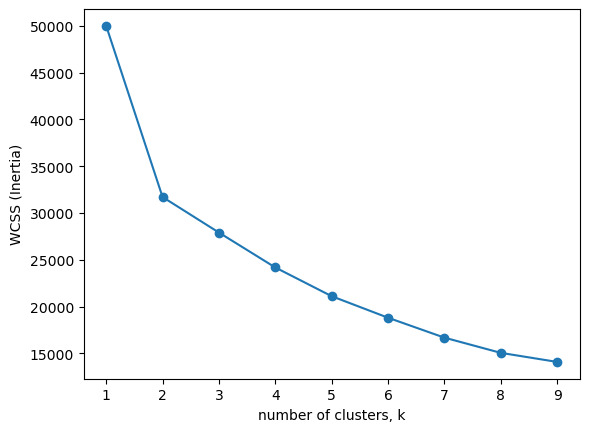

In [11]:
#find optimal clustering number
ks=range(1,10)
inertias=[]
for k in ks:
    model=KMeans(n_clusters=k, n_init=25)
    model.fit(churn_scaled)
    inertias.append(model.inertia_)
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [12]:
#fit kmeans on scaled data
model=KMeans(n_clusters=2, n_init=25, random_state=42)
model.fit(churn_scaled)

KMeans(n_clusters=2, n_init=25, random_state=42)

In [13]:
evaluate=pd.Series(model.labels_).value_counts()
evaluate

0    5002
1    4998
dtype: int64

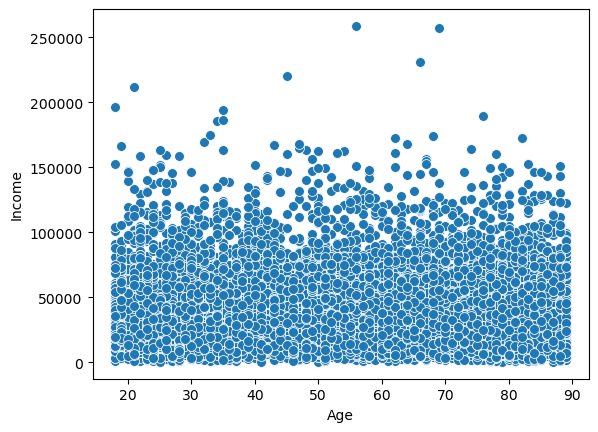

In [14]:
ax=sns.scatterplot(data=churn_selected, x='Age', y='Income', s=50)

In [15]:
#centroids
centroid=pd.DataFrame(model.cluster_centers_,
                      columns=['Age', 'Income', 'Tenure', 'MonthlyCharge','Bandwidth_GB_Year'])
centroid

Age    Income    Tenure  MonthlyCharge  Bandwidth_GB_Year
0 -0.019525 -0.002120 -0.960311       0.002333          -0.951883
1  0.019533  0.002121  0.960695      -0.002334           0.952264

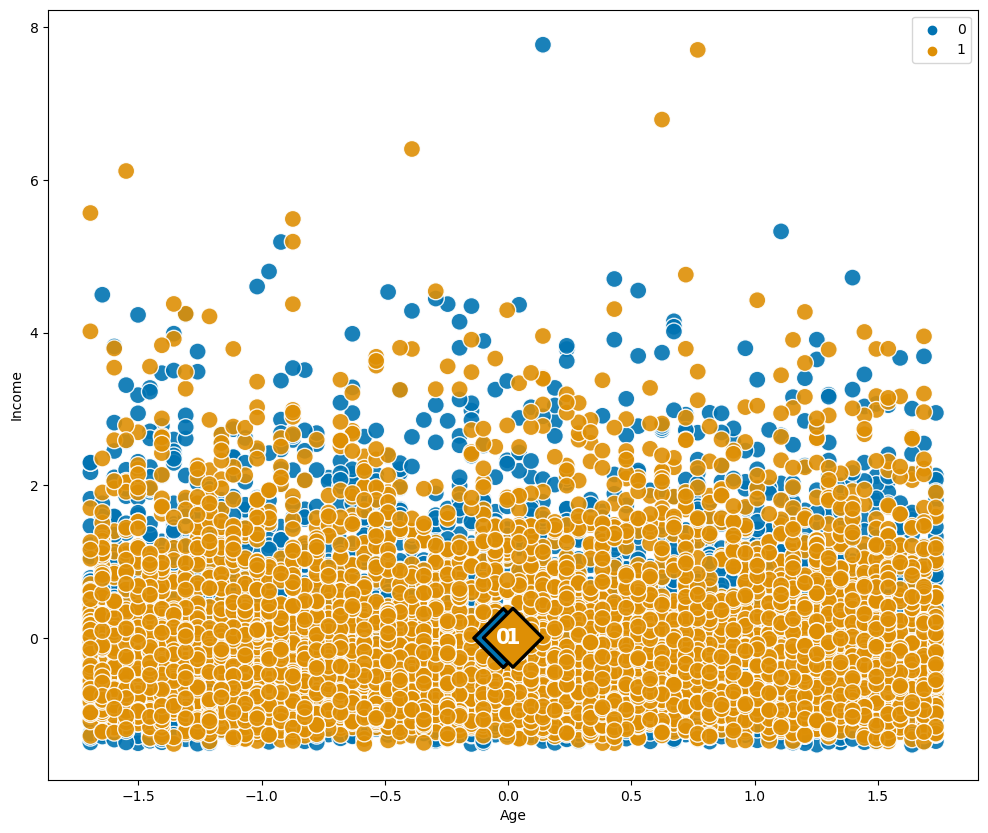

In [16]:
plt.figure(figsize=(12,10))
ax=sns.scatterplot(data=churn_scaled, x='Age', y='Income', hue=model.labels_, palette='colorblind', alpha=0.9, s=150, legend=True)
ax=sns.scatterplot(data=centroid, x='Age', y='Income', hue=centroid.index, palette='colorblind',s=900,marker='D', ec='black', legend=False)
for i in range (len(centroid)):
    plt.text(x=centroid.Age[i],
             y=centroid.Income[i],
             s=i,
             horizontalalignment='center',
             verticalalignment='center',
             size=15,
             weight='bold',
             color='white')

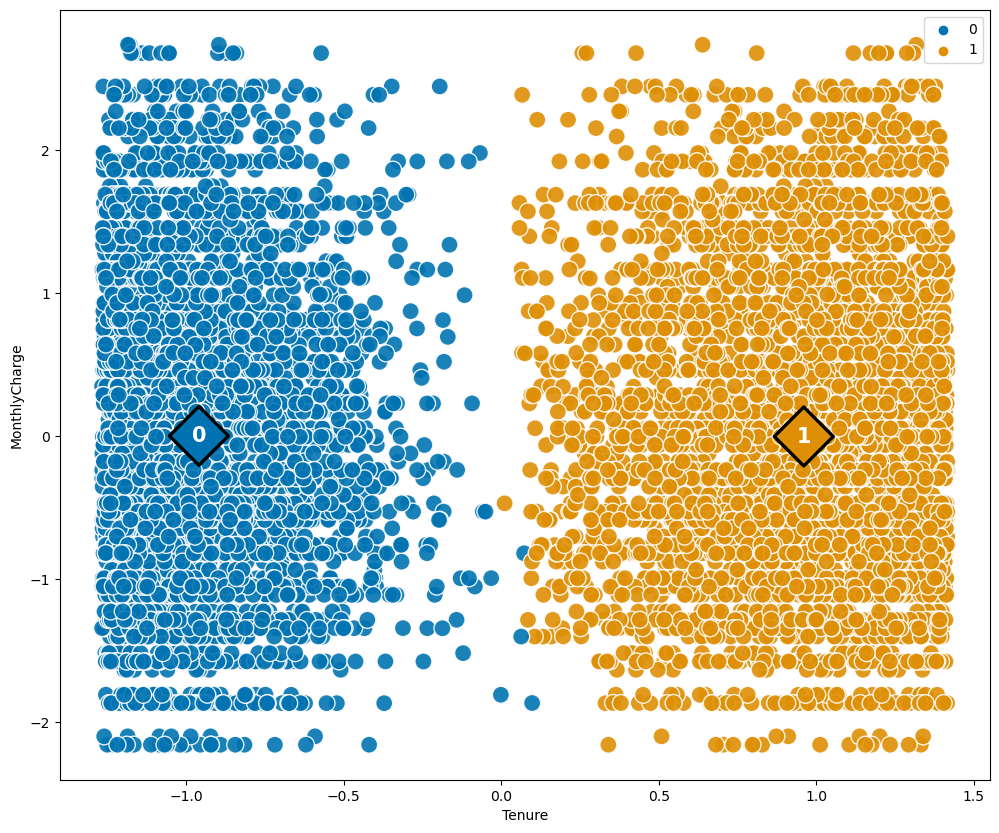

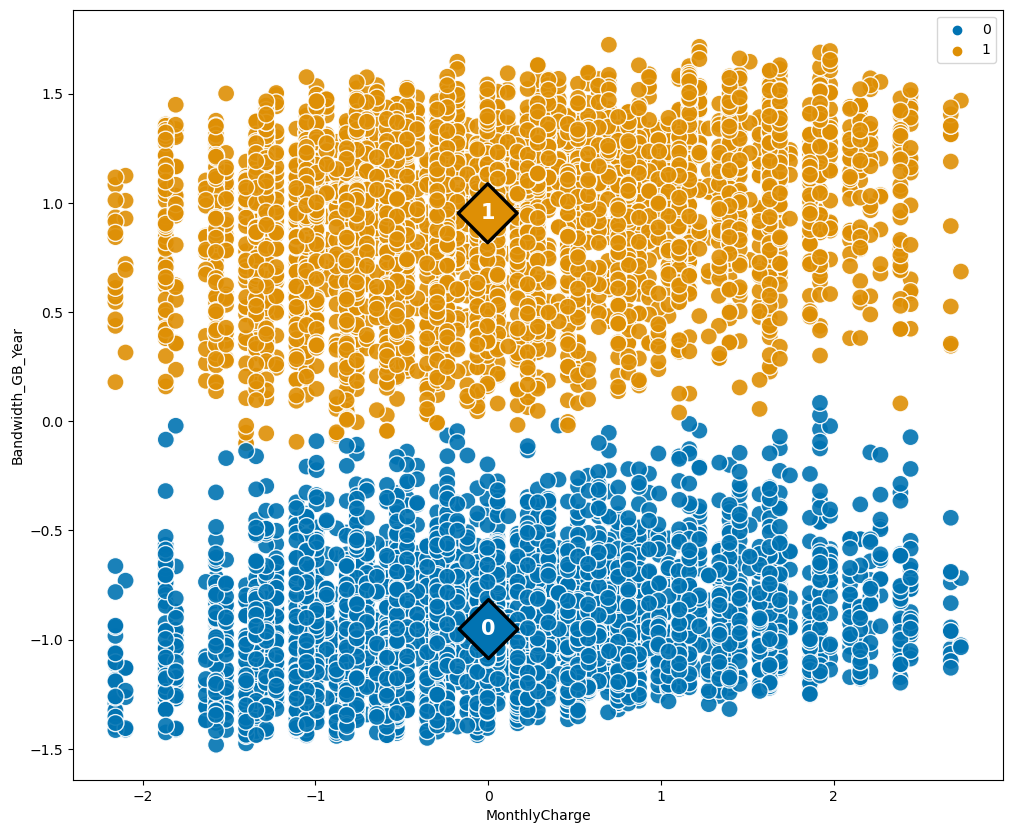

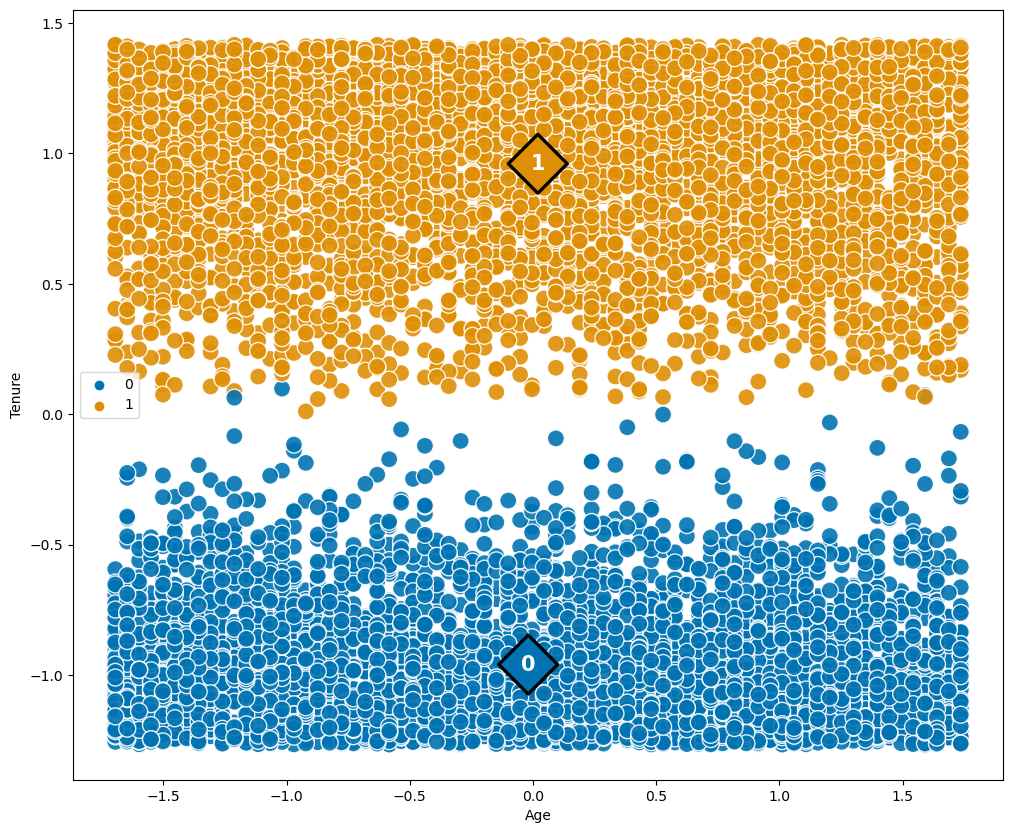

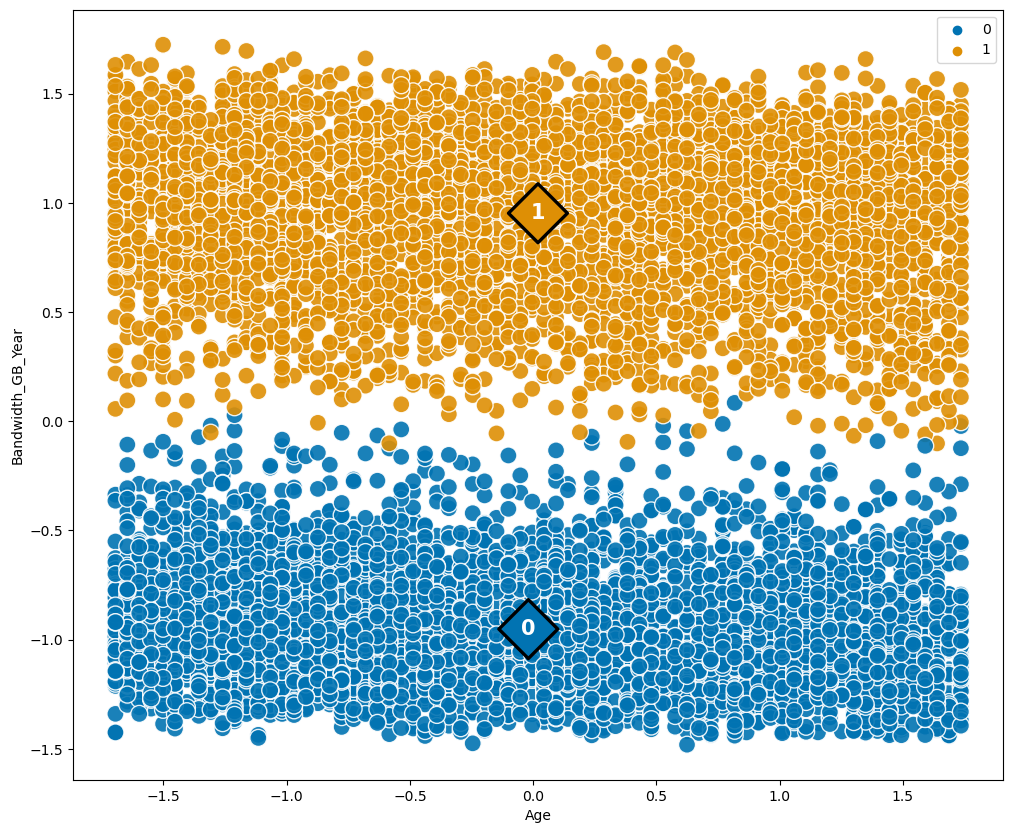

In [17]:
plt.figure(figsize=(12,10))
ax=sns.scatterplot(data=churn_scaled, x='Tenure', y='MonthlyCharge', hue=model.labels_, palette='colorblind', alpha=0.9, s=150, legend=True)
ax=sns.scatterplot(data=centroid, x='Tenure', y='MonthlyCharge', hue=centroid.index, palette='colorblind',s=900,marker='D', ec='black', legend=False)
for i in range (len(centroid)):
    plt.text(x=centroid.Tenure[i],
             y=centroid.MonthlyCharge[i],
             s=i,
             horizontalalignment='center',
             verticalalignment='center',
             size=15,
             weight='bold',
             color='white')

    
plt.figure(figsize=(12,10))
ax=sns.scatterplot(data=churn_scaled, x='MonthlyCharge', y='Bandwidth_GB_Year', hue=model.labels_, palette='colorblind', alpha=0.9, s=150, legend=True)
ax=sns.scatterplot(data=centroid, x='MonthlyCharge', y='Bandwidth_GB_Year', hue=centroid.index, palette='colorblind',s=900,marker='D', ec='black', legend=False)
for i in range (len(centroid)):
    plt.text(x=centroid.MonthlyCharge[i],
             y=centroid.Bandwidth_GB_Year[i],
             s=i,
             horizontalalignment='center',
             verticalalignment='center',
             size=15,
             weight='bold',
             color='white')
    
plt.figure(figsize=(12,10))
ax=sns.scatterplot(data=churn_scaled, x='Age', y='Tenure', hue=model.labels_, palette='colorblind', alpha=0.9, s=150, legend=True)
ax=sns.scatterplot(data=centroid, x='Age', y='Tenure', hue=centroid.index, palette='colorblind',s=900,marker='D', ec='black', legend=False)
for i in range (len(centroid)):
    plt.text(x=centroid.Age[i],
             y=centroid.Tenure[i],
             s=i,
             horizontalalignment='center',
             verticalalignment='center',
             size=15,
             weight='bold',
             color='white')   
    
plt.figure(figsize=(12,10))
ax=sns.scatterplot(data=churn_scaled, x='Age', y='Bandwidth_GB_Year', hue=model.labels_, palette='colorblind', alpha=0.9, s=150, legend=True)
ax=sns.scatterplot(data=centroid, x='Age', y='Bandwidth_GB_Year', hue=centroid.index, palette='colorblind',s=900,marker='D', ec='black', legend=False)
for i in range (len(centroid)):
    plt.text(x=centroid.Age[i],
             y=centroid.Bandwidth_GB_Year[i],
             s=i,
             horizontalalignment='center',
             verticalalignment='center',
             size=15,
             weight='bold',
             color='white')

In [18]:
fin_model=KMeans(n_clusters=2, n_init=25, random_state=300)
fin_model.fit(churn_scaled)

KMeans(n_clusters=2, n_init=25, random_state=300)

In [19]:
centroids=pd.DataFrame(fin_model.cluster_centers_,
                      columns=['Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure'])
centroids

Age    Income  MonthlyCharge  Bandwidth_GB_Year    Tenure
0 -0.019204 -0.002271      -0.960104           0.002169 -0.951715
1  0.019219  0.002273       0.960873          -0.002170  0.952477